In [1]:
import pandas as pd
df=pd.read_csv('survey_results_public.csv', index_col='ResponseId')
schema_df=pd.read_csv('survey_results_schema.csv', index_col='qname')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [8]:
country_reports=df['Country'].value_counts()

In [9]:
country_reports

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
                                                        ...  
Saint Kitts and Nevis                                       1
Dominica                                                    1
Saint Vincent and the Grenadines                            1
Tuvalu                                                      1
Papua New Guinea                                            1
Name: Country, Length: 181, dtype: int64

In [10]:
country_groupby = df.groupby(['Country'])

In [11]:
country_groupby

In [12]:
country_groupby.get_group('United States of America')

,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,I am a student who is learning to code,"Student, part-time",United States of America,Georgia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;Powe...,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Obj...,MySQL;PostgreSQL;SQLite,Elasticsearch;Firebase;IBM DB2;MariaDB;Microso...,NaN,NaN,Express;Flask;jQuery;React.js,Express;Flask;jQuery;React.js,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;Qt;React Native;TensorFlow;...,Git,Docker;Git;Unity 3D;Unreal Engine,IPython/Jupyter;Notepad++;PyCharm;Sublime Text...,Android Studio;IPython/Jupyter;Vim;Visual Stud...,Windows,Visit Stack Overflow;Go for a walk or other ph...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"Yes, somewhat",No,18-24 years old,Prefer not to say,No,Straight / Heterosexual,Prefer not to say,None of the above,I have a concentration and/or memory disorder ...,Too long,Neither easy nor difficult,NaN
7,I code primarily as a hobby,I prefer not to say,United States of America,New Hampshire,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",3,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;JavaScript,HTML/CSS;JavaScript;PHP,NaN,NaN,NaN,NaN,jQuery,jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",No,Prefer not to say,Prefer not to say,No,NaN,I don't know,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,NaN
16,I am a student who is learning to code,"Student, full-time",United States of America,Missouri,NaN,"Secondary school (e.g. American high school, G...",5 - 10 years,Other (please specify):,7,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell;Python,Bash/Shell;Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Git,Git,Emacs;Neovim;Vim,Neovim;Vim,Linux-based,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Less than once per month or monthly,Neutral,No,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Too long,Easy,NaN
37,I am a developer by profession,Employed full-time,United States of America,District of Columbia,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,Less than 1 year,"Developer, embedded applications or devices",20 to 99 employees,USD\tUnited States dollar,103000.0,Yearly,Assembly;C;Java;Kotlin;Rust,Assembly;Kotlin;Rust;SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Git,Git,IntelliJ;PyCharm;Webstorm,Android Studio;IntelliJ;PyCharm;Sublime Text;W...,Linux-based,Visit Stack Overflow;Google it;Do other work a...,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per week,"Yes, somewhat",Yes,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,Prefer not to say,Too short,Easy,103000.0
38,I am a developer by profession,Employed full-time,United States of America,Massachusetts,NaN,Some co

In [13]:
country_use_javaascript=country_groupby['LanguageHaveWorkedWith'].apply(lambda x: x.str.contains('JavaScript').sum())

In [14]:
country_use_javaascript

Country
Afghanistan                              32
Albania                                  51
Algeria                                  29
Andorra                                   8
Angola                                   14
                                       ... 
Venezuela, Bolivarian Republic of...     91
Viet Nam                                244
Yemen                                     8
Zambia                                   16
Zimbabwe                                 22
Name: LanguageHaveWorkedWith, Length: 181, dtype: int64

In [16]:
javascript_df=pd.concat([country_reports,country_use_javaascript], axis='columns', sort=False)

In [17]:
javascript_df

,Country,LanguageHaveWorkedWith
United States of America,15288,9987
India,10511,6460
Germany,5625,3389
United Kingdom of Great Britain and Northern Ireland,4475,2850
Canada,3012,1981
...,...,...
Saint Kitts and Nevis,1,1
Dominica,1,1
Saint Vincent and the Grenadines,1,0
Tuvalu,1,1


In [18]:
javascript_df.rename(columns={'Country':'num_reports','LanguageHaveWorkedWith':'num_knows_javascript'})

,num_reports,num_knows_javascript
United States of America,15288,9987
India,10511,6460
Germany,5625,3389
United Kingdom of Great Britain and Northern Ireland,4475,2850
Canada,3012,1981
...,...,...
Saint Kitts and Nevis,1,1
Dominica,1,1
Saint Vincent and the Grenadines,1,0
Tuvalu,1,1


In [23]:
javascript_df.rename(columns={'Country':'num_reports','LanguageHaveWorkedWith':'num_knows_javascript'}, inplace=True)

In [24]:
javascript_df

,num_reports,num_knows_javascript
United States of America,15288,9987
India,10511,6460
Germany,5625,3389
United Kingdom of Great Britain and Northern Ireland,4475,2850
Canada,3012,1981
...,...,...
Saint Kitts and Nevis,1,1
Dominica,1,1
Saint Vincent and the Grenadines,1,0
Tuvalu,1,1


In [25]:
df=pd.read_csv('ETH_1h.csv')

In [26]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [27]:
df.head(50)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 03-PM,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 02-PM,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 01-PM,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12-PM,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11-AM,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [29]:
df['Date'][0]

'2020-03-13 08-PM'

In [31]:
df.loc[0,'Date']

'2020-03-13 08-PM'

In [32]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [33]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [34]:
df.loc[0,'Date'].day_name()

'Friday'

In [35]:
df.loc[500,'Date'].day_name()

'Saturday'

In [40]:
d_parse=lambda x:pd.datetime.strptime(x,'%Y-%m-%d %I-%p')

In [43]:
df=pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser=d_parse)

/var/folders/3s/g1lyd01905s33dt6txc6jyc00000gn/T/ipykernel_1383/3129774585.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parse=lambda x:pd.datetime.strptime(x,'%Y-%m-%d %I-%p')


In [46]:
df.head(35)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [48]:
df.loc[0,'Date'].day_name()

'Saturday'

In [50]:
df['Date'].dt.day_name().head(50)

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
5        Friday
6        Friday
7        Friday
8        Friday
9        Friday
10       Friday
11       Friday
12       Friday
13       Friday
14       Friday
15       Friday
16       Friday
17       Friday
18       Friday
19       Friday
20       Friday
21     Thursday
22     Thursday
23     Thursday
24     Thursday
25     Thursday
26     Thursday
27     Thursday
28     Thursday
29     Thursday
30     Thursday
31     Thursday
32     Thursday
33     Thursday
34     Thursday
35     Thursday
36     Thursday
37     Thursday
38     Thursday
39     Thursday
40     Thursday
41     Thursday
42     Thursday
43     Thursday
44     Thursday
45    Wednesday
46    Wednesday
47    Wednesday
48    Wednesday
49    Wednesday
Name: Date, dtype: object

In [51]:
df['DayofWeek']= df['Date'].dt.day_name()

In [53]:
df['DayofWeek']

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: DayofWeek, Length: 23674, dtype: object

In [54]:
df

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
23669,2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
23670,2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
23671,2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday
23672,2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87,Saturday


In [55]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [56]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [57]:
df['Date'].max()-df['Date'].min()

Timedelta('986 days 09:00:00')

In [78]:
filt=(df['Date']>='2019-01-01')

In [79]:
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [85]:
filt = (df['Date'] >= '2019-01-01') & (df['Date']<'2020')

In [84]:
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [87]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date']<pd.to_datetime('2020-01-01'))

In [88]:
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayofWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [89]:
df.set_index('Date')

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [90]:
df.set_index('Date', inplace=True)

In [91]:
df

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [92]:
df['2018']

/var/folders/3s/g1lyd01905s33dt6txc6jyc00000gn/T/ipykernel_1383/1420412184.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018']


,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39,Monday
2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62,Monday
2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65,Monday
2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69,Monday
2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07,Monday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


In [93]:
df

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [95]:
df['2020-01':'2020-02'].head(30)

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
2020-02-29 18:00:00,ETHUSD,225.53,226.17,224.50,225.09,496543.91,Saturday
2020-02-29 17:00:00,ETHUSD,222.68,225.53,222.24,225.53,611136.47,Saturday
2020-02-29 16:00:00,ETHUSD,224.17,225.93,222.36,222.68,694384.75,Saturday
2020-02-29 15:00:00,ETHUSD,223.35,225.88,221.80,224.17,550893.74,Saturday


In [97]:
df['2020-01':'2020-02']['Close'].head(40)

Date
2020-02-29 23:00:00    217.31
2020-02-29 22:00:00    223.35
2020-02-29 21:00:00    223.48
2020-02-29 20:00:00    224.63
2020-02-29 19:00:00    225.31
2020-02-29 18:00:00    225.09
2020-02-29 17:00:00    225.53
2020-02-29 16:00:00    222.68
2020-02-29 15:00:00    224.17
2020-02-29 14:00:00    223.35
2020-02-29 13:00:00    224.42
2020-02-29 12:00:00    225.29
2020-02-29 11:00:00    226.50
2020-02-29 10:00:00    223.11
2020-02-29 09:00:00    225.86
2020-02-29 08:00:00    228.78
2020-02-29 07:00:00    229.73
2020-02-29 06:00:00    228.67
2020-02-29 05:00:00    232.13
2020-02-29 04:00:00    232.09
2020-02-29 03:00:00    230.41
2020-02-29 02:00:00    229.23
2020-02-29 01:00:00    227.45
2020-02-29 00:00:00    229.81
2020-02-28 23:00:00    227.37
2020-02-28 22:00:00    229.90
2020-02-28 21:00:00    226.12
2020-02-28 20:00:00    223.64
2020-02-28 19:00:00    222.41
2020-02-28 18:00:00    221.40
2020-02-28 17:00:00    222.85
2020-02-28 16:00:00    223.77
2020-02-28 15:00:00    227.07
2020-

In [98]:
df['2020-01':'2020-02']['Close'].mean()

195.16559027777814

In [99]:
df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [100]:
df['2020-01-01']['High']

/var/folders/3s/g1lyd01905s33dt6txc6jyc00000gn/T/ipykernel_1383/1672683708.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-01']['High']


Date
2020-01-01 23:00:00    130.27
2020-01-01 22:00:00    131.41
2020-01-01 21:00:00    131.99
2020-01-01 20:00:00    131.87
2020-01-01 19:00:00    131.72
2020-01-01 18:00:00    132.14
2020-01-01 17:00:00    132.68
2020-01-01 16:00:00    132.56
2020-01-01 15:00:00    132.15
2020-01-01 14:00:00    132.05
2020-01-01 13:00:00    132.08
2020-01-01 12:00:00    131.31
2020-01-01 11:00:00    131.42
2020-01-01 10:00:00    130.33
2020-01-01 09:00:00    130.22
2020-01-01 08:00:00    130.01
2020-01-01 07:00:00    130.25
2020-01-01 06:00:00    130.25
2020-01-01 05:00:00    129.94
2020-01-01 04:00:00    130.00
2020-01-01 03:00:00    130.44
2020-01-01 02:00:00    130.50
2020-01-01 01:00:00    130.14
2020-01-01 00:00:00    128.54
Name: High, dtype: float64

In [101]:
df['2018']

/var/folders/3s/g1lyd01905s33dt6txc6jyc00000gn/T/ipykernel_1383/1420412184.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018']


,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2018-12-31 23:00:00,ETHUSD,130.62,131.36,130.20,130.53,869026.39,Monday
2018-12-31 22:00:00,ETHUSD,129.97,131.00,129.07,130.62,1972726.62,Monday
2018-12-31 21:00:00,ETHUSD,130.90,130.90,129.47,129.97,1079617.65,Monday
2018-12-31 20:00:00,ETHUSD,131.17,131.58,130.36,130.90,1775465.69,Monday
2018-12-31 19:00:00,ETHUSD,134.83,134.90,128.50,131.17,3380282.07,Monday
...,...,...,...,...,...,...,...
2018-01-01 04:00:00,ETHUSD,739.70,748.07,733.02,747.90,3180304.69,Monday
2018-01-01 03:00:00,ETHUSD,730.01,739.70,728.66,739.70,3461348.11,Monday
2018-01-01 02:00:00,ETHUSD,730.02,730.50,727.14,730.01,2950627.37,Monday


In [102]:
df['2018-12-31']['High']

/var/folders/3s/g1lyd01905s33dt6txc6jyc00000gn/T/ipykernel_1383/2840988632.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-12-31']['High']


Date
2018-12-31 23:00:00    131.36
2018-12-31 22:00:00    131.00
2018-12-31 21:00:00    130.90
2018-12-31 20:00:00    131.58
2018-12-31 19:00:00    134.90
2018-12-31 18:00:00    135.03
2018-12-31 17:00:00    135.39
2018-12-31 16:00:00    136.97
2018-12-31 15:00:00    137.40
2018-12-31 14:00:00    137.61
2018-12-31 13:00:00    135.94
2018-12-31 12:00:00    135.47
2018-12-31 11:00:00    135.52
2018-12-31 10:00:00    136.01
2018-12-31 09:00:00    136.83
2018-12-31 08:00:00    135.23
2018-12-31 07:00:00    135.89
2018-12-31 06:00:00    135.89
2018-12-31 05:00:00    135.69
2018-12-31 04:00:00    136.01
2018-12-31 03:00:00    135.91
2018-12-31 02:00:00    136.78
2018-12-31 01:00:00    137.65
2018-12-31 00:00:00    138.90
Name: High, dtype: float64

In [104]:
df['2018-12-31']['High'].max()

/var/folders/3s/g1lyd01905s33dt6txc6jyc00000gn/T/ipykernel_1383/2924581009.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-12-31']['High'].max()


138.9

In [105]:
high=df['High'].resample('D').max()

In [106]:
high['2018-12-31']

138.9

In [107]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

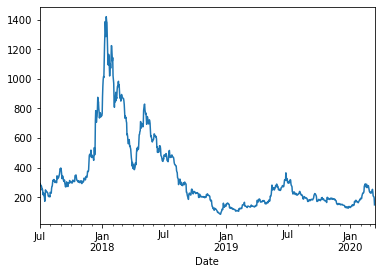

In [109]:
high.plot()

In [110]:
df.set_index('Symbol')

,Open,High,Low,Close,Volume,DayofWeek
Symbol,,,,,,
ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...
ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


<AxesSubplot:xlabel='Date'>

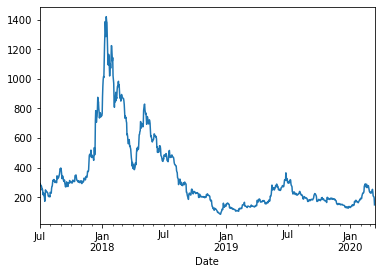

In [111]:
high.plot()

In [112]:
df

,Symbol,Open,High,Low,Close,Volume,DayofWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [113]:
df.resample('W').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06
2017-07-23,212.351429,215.779286,209.126310,212.783750,4.298593e+06
2017-07-30,203.496190,205.110357,201.714048,203.309524,1.581729e+06
...,...,...,...,...,...
2020-02-16,255.021667,257.255238,252.679762,255.198452,2.329087e+06
2020-02-23,265.220833,267.263690,262.948512,265.321905,1.826094e+06
2020-03-01,236.720536,238.697500,234.208750,236.373988,2.198762e+06


In [116]:
df.resample('W').agg({'Volume':'sum', 'High':'max', 'Low':'min', 'Close':'mean'})

,Volume,High,Low,Close
Date,,,,
2017-07-02,8.084631e+07,293.73,253.23,268.202162
2017-07-09,2.246746e+08,285.00,231.25,261.062083
2017-07-16,5.017750e+08,240.33,130.26,195.698393
2017-07-23,7.221637e+08,249.40,153.25,212.783750
2017-07-30,2.657305e+08,229.99,178.03,203.309524
...,...,...,...,...
2020-02-16,3.912867e+08,290.00,216.31,255.198452
2020-02-23,3.067838e+08,287.13,242.36,265.321905
2020-03-01,3.693920e+08,278.13,209.26,236.373988
